In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('1716985255_marketing_campaign_dataset\marketing_data.csv')
print(df.head())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [3]:
# Step 1: Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Step 2: Convert all values in the 'Income' column to strings
df['Income'] = df['Income'].astype(str)

# Step 3: Strip dollar signs and commas from the Income column
df['Income'] = df['Income'].str.replace('$', '', regex=False) # Remove dollar sign
df['Income'] = df['Income'].str.replace(',', '', regex=False) # Remove commas

# Optional: Check unique values after stripping
# unique_values = df['Income'].unique()
# print("Unique values in 'Income' after cleaning:", unique_values)

# Step 4: Convert to numeric
df['Income'] = pd.to_numeric(df['Income'], errors = 'coerce')

# Check missing values after conversion
missing_income_count = df['Income'].isnull().sum()
print(f'Missing Income Values after conversion: {missing_income_count}')

# Step 5: Impute missing income values with the group average
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

# Check missing values after imputation
print(f'Missing Income Values after imputation: {df["Income"].isnull().sum()}')
print(df['Income'].head())  # Check the first few values

Missing Income Values after conversion: 24
Missing Income Values after imputation: 0
0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


In [4]:
# Create new features
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
print(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']])

      Total_Children  Age  Total_Spending  Total_Purchases
0                  0   54            1190               14
1                  0   63             577               17
2                  1   66             251               10
3                  2   57              11                3
4                  1   35              91                6
...              ...  ...             ...              ...
2235               1   48             689               18
2236               1   47              55                4
2237               1   48             309               12
2238               0   46            1383               19
2239               2   55            1078               17

[2240 rows x 4 columns]


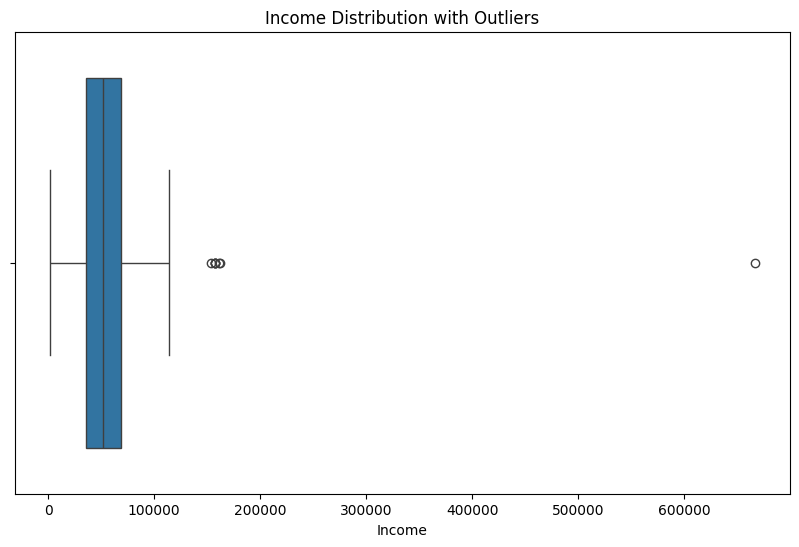

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Income', data= df)
plt.title('Income Distribution with Outliers')
# Outlier treatment: Optionally remove extreme outliers based on the IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

plt.xlabel('Income')
plt.show()

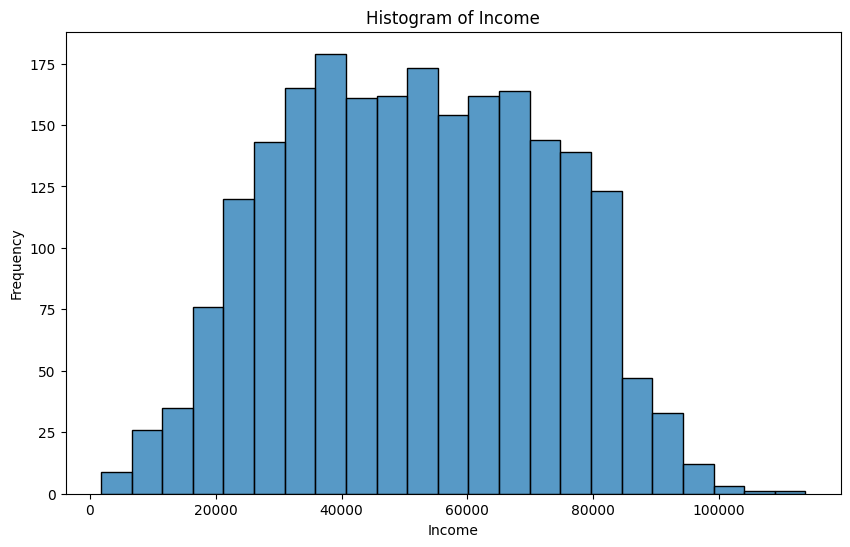

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['Income'],edgecolor = 'black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Print column names to verify if 'Marital_Status' and 'Country' exist
print("Columns in DataFrame:", df.columns)

# Step 2: Strip any leading/trailing spaces from column names, if necessary
df.columns = df.columns.str.strip()

# Step 3: Check for missing values in the specified columns
if 'Marital_Status' in df.columns and 'Country' in df.columns:
    print("Missing values in 'Marital_Status':", df['Marital_Status'].isnull().sum())
    print("Missing values in 'Country':", df['Country'].isnull().sum())
else:
    print("'Marital_Status' or 'Country' column not found in the DataFrame")

# Step 4: Apply One-Hot Encoding for categorical variables if columns exist
if 'Marital_Status' in df.columns and 'Country' in df.columns:
    df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True)
else:
    print("Skipping One-Hot Encoding: Required columns are not present.")

# Step 5: Apply Ordinal Encoding for the 'Education' column
if 'Education' in df.columns:
    education_order = ['Basic', 'Graduation', 'Master', 'PhD', '2n Cycle']
    ordinal_encoder = OrdinalEncoder(categories=[education_order])
    df['Education_Encoded'] = ordinal_encoder.fit_transform(df[['Education']])
    print("Education column encoded successfully.")
else:
    print("'Education' column not found in the DataFrame")

# Optional: View the updated DataFrame
print(df.head())

Columns in DataFrame: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age'],
      dtype='object')
Missing values in 'Marital_Status': 0
Missing values in 'Country': 0
Education column encoded successfully.
      ID  Year_Birth   Education       Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation  $84,835.00         0         0     6/16/14   
1      1        1961  Graduation  $57,091.00         0         0     6/15/14   
2  10476        1958  Graduation  $67,267.00         0         1     5/13/14   
3   1386        1967  Graduation  $32,47

Text(0.5, 1.0, 'Correalation Matrix')

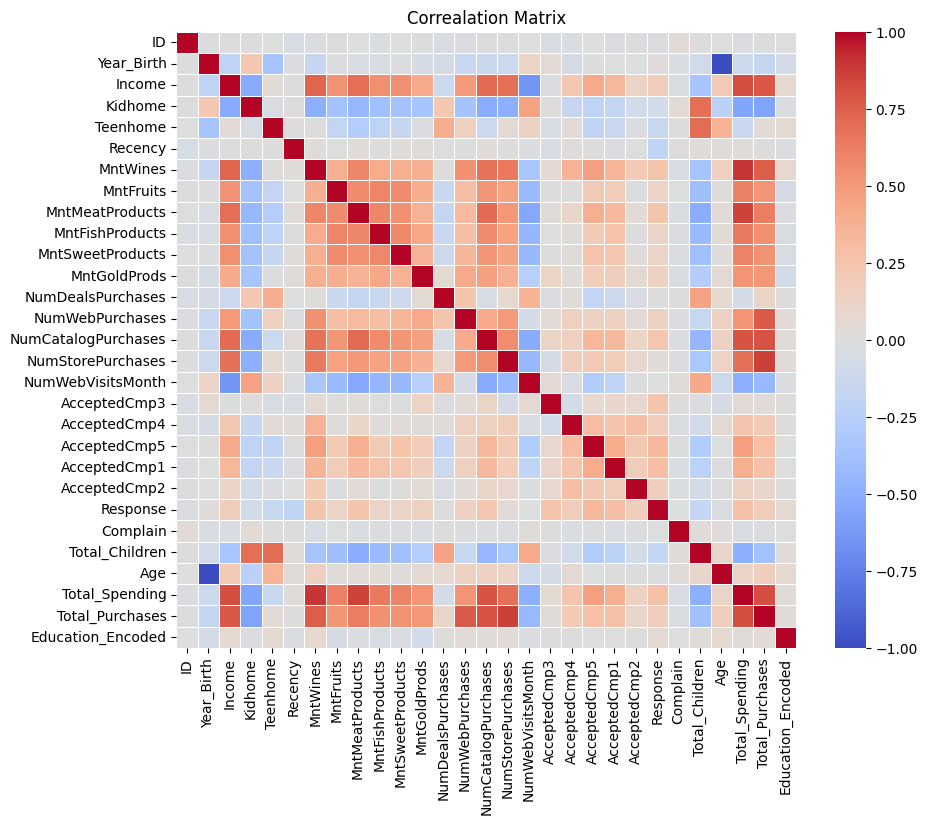

In [15]:
# Correlation heatmap
plt.figure(figsize=(10,8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(),annot=False,cmap = 'coolwarm',linewidth = 0.5)
plt.title('Correalation Matrix')

In [22]:
# Divide customers into two groups: older and younger customers based on median age
from datetime import datetime

# Assuming there's a 'birth_year' column
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
median_age = df['Age'].median()

older_customers = df[df['Age'] > median_age]
younger_customers = df[df['Age'] <= median_age]

# Perform two-sample t-test between in-store purchases for older and younger customers
t_stat, p_value = stats.ttest_ind(older_customers['NumStorePurchases'], younger_customers['NumStorePurchases'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Older individuals significantly prefer in-store shopping.")
else:
    print("Fail to reject the null hypothesis: No significant difference in preference for in-store shopping between older and younger individuals.")


T-statistic: 6.334764651957808, P-value: 2.864558561083143e-10
Reject the null hypothesis: Older individuals significantly prefer in-store shopping.


In [29]:
# Assuming you have columns like 'Kidhome' and 'Teenhome'
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
with_children = df[df['Total_Children'] > 0]
without_children = df[df['Total_Children'] == 0]
t_stat, p_value = stats.ttest_ind(with_children['NumWebPurchases'], without_children['NumWebPurchases'])
print(f"T-statistics: {t_stat}, P-value: {p_value}")
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Customers with children significantly prefer online shopping.")
else:
    print("Fail to reject the null hypothesis: No significant difference in online shopping preference between customers with and without children.")

T-statistics: -3.324463087423873, P-value: 0.0009001778860238199
Reject the null hypothesis: Customers with children significantly prefer online shopping.


In [32]:
# Calculate correlation between store purchases and web/catalog purchases
corr_web_store = df['NumWebPurchases'].corr(df['NumStorePurchases'])
corr_catalog_store = df['NumCatalogPurchases'].corr(df['NumStorePurchases'])

print(f"Correlation between web and store purchases: {corr_web_store}")
print(f"Correlation between catalog and store purchases: {corr_catalog_store}")

# Interpretation
if corr_web_store < 0 and corr_catalog_store < 0:
    print("There is a negative correlation between store sales and web/catalog purchases, suggesting cannibalization.")
else:
    print("There is no significant cannibalization effect between store sales and web/catalog purchases.")


Correlation between web and store purchases: 0.5027134132997321
Correlation between catalog and store purchases: 0.5187382827187556
There is no significant cannibalization effect between store sales and web/catalog purchases.


In [38]:
# print(df.columns)
# Divide customers into US and non-US groups
us_customers = df[df['Country_US'] == 1]
non_us_customers = df[df['Country_US'] == 0]

# Perform two-sample t-test for total purchases between US and non-US customers
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
t_stat, p_value = stats.ttest_ind(us_customers['Total_Purchases'], non_us_customers['Total_Purchases'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The United States significantly outperforms the rest of the world in total purchase volumes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total purchase volumes between the United States and other countries.")


Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_CA',
       'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP',
       'Country_US', 'Education_Encoded', 'Total_Children', 'Total_Purchases'],
      dtype='object')
T-statistic: 1.8049578917961837, P-value: 0.07121562869350608
Fail to reject the null hypothesis: No significant difference in total purchase volumes be

###vISUALIZATION 

C:\Users\adity\AppData\Local\Temp\ipykernel_5980\1880018298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_summary, x='Product', y='Total_Revenue', palette='viridis')


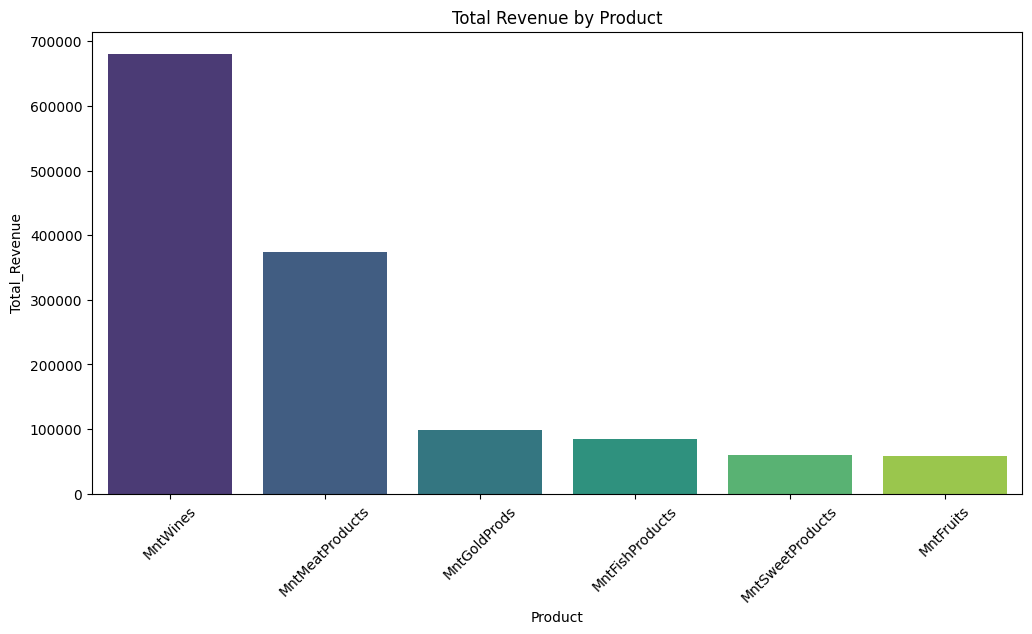

In [42]:
# Calculate total revenue for each product category
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Revenue'] = df[product_columns].sum(axis=1)

# Group by product and calculate total revenue
revenue_summary = df[product_columns].sum().reset_index()
revenue_summary.columns = ['Product', 'Total_Revenue']

# Sort by revenue
revenue_summary = revenue_summary.sort_values(by='Total_Revenue', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_summary, x='Product', y='Total_Revenue', palette='viridis')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.show()


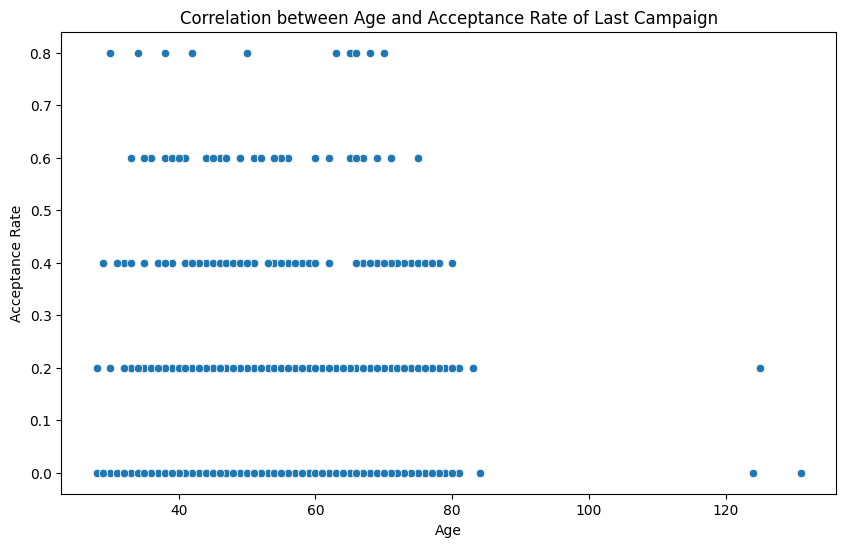

Correlation coefficient between Age and Acceptance Rate: 0.00


In [43]:
# Calculate acceptance rate of the last campaign
df['Last_Campaign_Accepted'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
acceptance_rate = df['Last_Campaign_Accepted'] / 5  # Assuming equal weighting

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y=acceptance_rate)
plt.title('Correlation between Age and Acceptance Rate of Last Campaign')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.show()

# Correlation coefficient
correlation = df['Age'].corr(acceptance_rate)
print(f"Correlation coefficient between Age and Acceptance Rate: {correlation:.2f}")


C:\Users\adity\AppData\Local\Temp\ipykernel_5980\2109060797.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_acceptance_df, x='Country', y='Total_Accepted', palette='coolwarm')


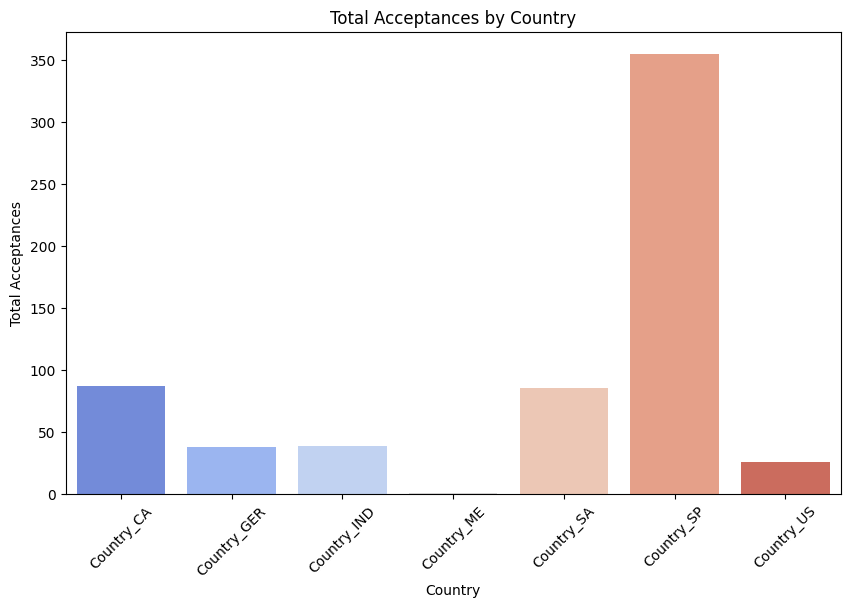

Country with the highest number of customers who accepted the last campaign: Country_SP with 355 acceptances.


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total number of acceptances for each customer
df['Total_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Group by country and calculate total acceptances
country_columns = ['Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']
country_totals = {country: df[df[country] == 1]['Total_Accepted'].sum() for country in country_columns}

# Convert the country totals dictionary to a DataFrame
country_acceptance_df = pd.DataFrame(country_totals.items(), columns=['Country', 'Total_Accepted'])

# Find the country with the maximum acceptance
max_country_row = country_acceptance_df.loc[country_acceptance_df['Total_Accepted'].idxmax()]
max_country = max_country_row['Country']
max_value = max_country_row['Total_Accepted']

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=country_acceptance_df, x='Country', y='Total_Accepted', palette='coolwarm')
plt.title('Total Acceptances by Country')
plt.xlabel('Country')
plt.ylabel('Total Acceptances')
plt.xticks(rotation=45)
plt.show()

print(f"Country with the highest number of customers who accepted the last campaign: {max_country} with {max_value} acceptances.")


C:\Users\adity\AppData\Local\Temp\ipykernel_5980\1813689102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Kidhome', y='Total_Purchases', palette='Set1')


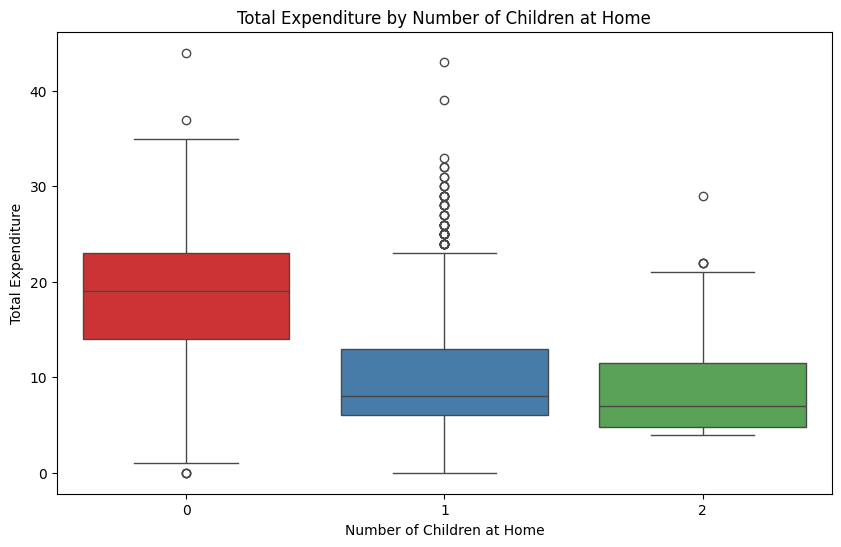

In [55]:
# Total expenditure is already calculated in the Total_Purchases column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kidhome', y='Total_Purchases', palette='Set1')
plt.title('Total Expenditure by Number of Children at Home')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.show()


### Investigatge Education of customers who have complaint in last two yesrs

C:\Users\adity\AppData\Local\Temp\ipykernel_5980\3733235176.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_complaints, x='Education', y='Number_of_Complaints', palette='magma')


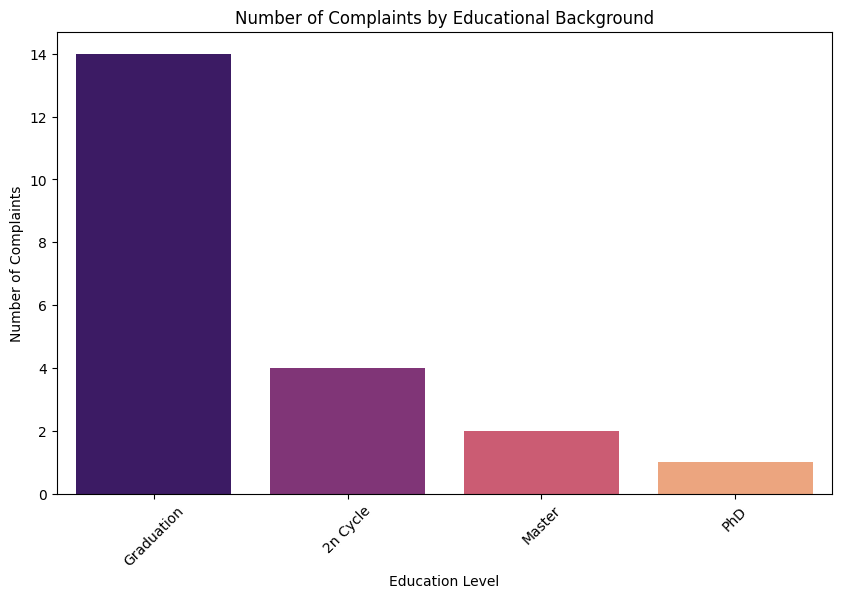

In [56]:
# Filter for customers who lodged complaints
# Count the number of complaints by education level
education_complaints = complainants['Education'].value_counts().reset_index()
education_complaints.columns = ['Education', 'Number_of_Complaints']

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=education_complaints, x='Education', y='Number_of_Complaints', palette='magma')
plt.title('Number of Complaints by Educational Background')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()
